# Preprocessing
***

In [110]:
import sys
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
from PIL import Image

Our mask detection model is trained on close-up shots of images. Additionally, the model expects images containing 1 face. A real-world image may contain multiple faces, and also will not be perfectly zoomed in. So we will use an *image-based* approach (mtcnn, OpenCV) to detecting face bounding boxes given an image. Then we will extract pixels for each face, and send to our Tensorflow model for inference to detect masks.

Image-based methods rely on techniques from statistical analysis and machine learning to find the relevant characteristics of face and non-face images. 

## Detecting Bounding Box for Faces

In [109]:
# draw an image with detected objects
def draw_facebox(filename, result_list):
    # load the image
    data = plt.imread(filename)
    
    # plot the image
    plt.imshow(data)
    # get the context for drawing boxes
    ax = plt.gca()
    # plot each box
    for result in result_list:
    # get coordinates
        x, y, width, height = result['box']
        # create the shape
        rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
        # draw the box
        ax.add_patch(rect)
    # show the plot
    plt.axis('off')
    plt.show()

In [105]:
detector = MTCNN()

In [106]:
filename = 'people.jpg' # filename is defined above, otherwise uncomment

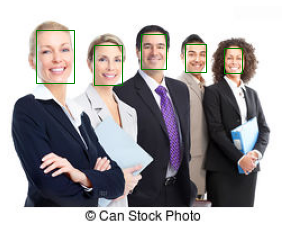

In [107]:
# load image from file
pixels = plt.imread(filename) # defined above, otherwise uncomment
# detector is defined above, otherwise uncomment
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_facebox(filename, faces)

In [91]:
faces

[{'box': [119, 24, 22, 31],
  'confidence': 0.9999927282333374,
  'keypoints': {'left_eye': (125, 36),
   'right_eye': (136, 36),
   'nose': (131, 42),
   'mouth_left': (125, 46),
   'mouth_right': (136, 47)}},
 {'box': [25, 21, 34, 47],
  'confidence': 0.99988853931427,
  'keypoints': {'left_eye': (35, 41),
   'right_eye': (51, 39),
   'nose': (45, 48),
   'mouth_left': (37, 56),
   'mouth_right': (53, 54)}},
 {'box': [193, 37, 16, 22],
  'confidence': 0.999670147895813,
  'keypoints': {'left_eye': (198, 46),
   'right_eye': (206, 46),
   'nose': (201, 51),
   'mouth_left': (197, 54),
   'mouth_right': (206, 54)}},
 {'box': [158, 33, 19, 25],
  'confidence': 0.9995881915092468,
  'keypoints': {'left_eye': (164, 43),
   'right_eye': (174, 43),
   'nose': (170, 49),
   'mouth_left': (163, 51),
   'mouth_right': (173, 52)}},
 {'box': [77, 34, 25, 36],
  'confidence': 0.9989978671073914,
  'keypoints': {'left_eye': (85, 48),
   'right_eye': (98, 48),
   'nose': (93, 56),
   'mouth_left': 

In [93]:
len(faces)

5

In [94]:
face = faces[0]

The bounding box is formatted as [x, y, width, height] under the key 'box'.

In [99]:
face.get('box')

[119, 24, 22, 31]

## Make Predictions Using Bounding Boxes

In [68]:
img = Image.open("people.jpg")

Get *Pillow* image using bounding boxes. In *Pillow*, a box is a 4-tuple defining the left, upper, right, and lower pixel coordinate. Must convert the bounding box numbers outputted from MTCNN to box format.

In [69]:
box1 = (119, 24, 141, 55)
im1 = img.crop(box1)

In [70]:
im1.show()

In [46]:
box2 = (25, 21, 59, 68)
im2 = img.crop(box2)

In [47]:
im2.show()

In [48]:
type(im2)

PIL.Image.Image

Convert Pillow image to numpy array for Tensorflow model inference.

In [ ]:
# resize image to 224,224

In [71]:
new_width  = 224
new_height = 224
img = im1.resize((new_width, new_height), Image.ANTIALIAS)

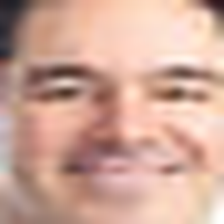

In [72]:
img

In [79]:
# convert image to numpy array
image = tf.keras.preprocessing.image.img_to_array(img)

In [80]:
# normalize image with same technique used during training
image = tf.keras.applications.vgg16.preprocess_input(image)

In [81]:
# add batch dimension to obtain (1, 224, 224, 3) tensor

In [82]:
image = np.expand_dims(image, axis=0)

Our (1, 224, 224, 3) tensor is ready to be sent to our Tensorflow model for inference.

In [84]:
image.shape

(1, 224, 224, 3)

## Display/Save Colored Bounding Boxes